In [1]:
from subprocess import check_output
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

In [2]:
(trainX, trainY), (validateX, validateY) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
trainX.shape

(60000, 28, 28)

In [4]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols)

**[DNN model - default Adam - no dropout]**

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [6]:
def get_fashion_model_mnist_dnn():
  model = models.Sequential()
  model.add(layers.Dense(units = 128, activation = "relu", input_shape = (image_shape[0]*image_shape[1], )))
  model.add(layers.Dense(units = 64, activation = "relu"))
  model.add(layers.Dense(units = 32, activation = "relu"))
  model.add(layers.Dense(units = 10, activation = "softmax"))
  return  model

In [8]:
fashion_model_mnist_dnn = get_fashion_model_mnist_dnn()

In [9]:
fashion_model_mnist_dnn.compile(optimizer = "rmsprop", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [10]:
flattenedTrainX = trainX.reshape(60000, 28*28)
flattenedValidateX = validateX.reshape(10000, 28*28)

In [11]:
tf.config.run_functions_eagerly(True)
history_dnn = fashion_model_mnist_dnn.fit(flattenedTrainX, trainY, batch_size = 128, epochs = 75, validation_split=0.2)

Epoch 1/75
375/375 [==============================] - 27s 70ms/step - loss: 3.4345 - accuracy: 0.6555 - val_loss: 0.7041 - val_accuracy: 0.7812
Epoch 2/75
375/375 [==============================] - 16s 44ms/step - loss: 0.7043 - accuracy: 0.7836 - val_loss: 0.7006 - val_accuracy: 0.7768
Epoch 3/75
375/375 [==============================] - 17s 45ms/step - loss: 0.5263 - accuracy: 0.8209 - val_loss: 0.4751 - val_accuracy: 0.8415
Epoch 4/75
375/375 [==============================] - 17s 46ms/step - loss: 0.4681 - accuracy: 0.8371 - val_loss: 0.5042 - val_accuracy: 0.8340
Epoch 5/75
375/375 [==============================] - 17s 44ms/step - loss: 0.4361 - accuracy: 0.8488 - val_loss: 0.4198 - val_accuracy: 0.8509
Epoch 6/75
375/375 [==============================] - 16s 42ms/step - loss: 0.4102 - accuracy: 0.8560 - val_loss: 0.4272 - val_accuracy: 0.8578
Epoch 7/75
375/375 [==============================] - 17s 44ms/step - loss: 0.3916 - accuracy: 0.8619 - val_loss: 0.4192 - val_accuracy:

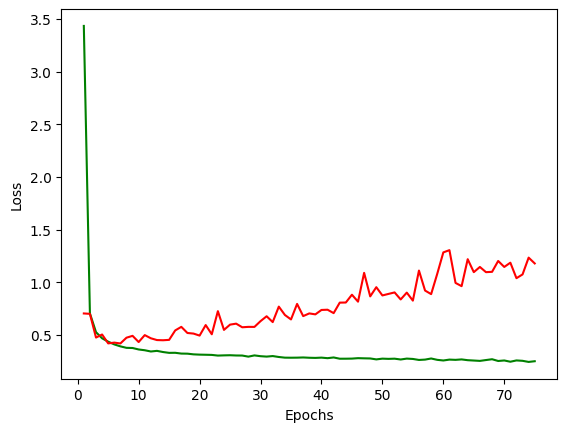

In [12]:
loss = history_dnn.history["loss"]
val_loss = history_dnn.history["val_loss"]
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(1,76), loss, "g", label = "Training Loss")
plt.plot(range(1,76), val_loss, "r", label = "Validation Loss")

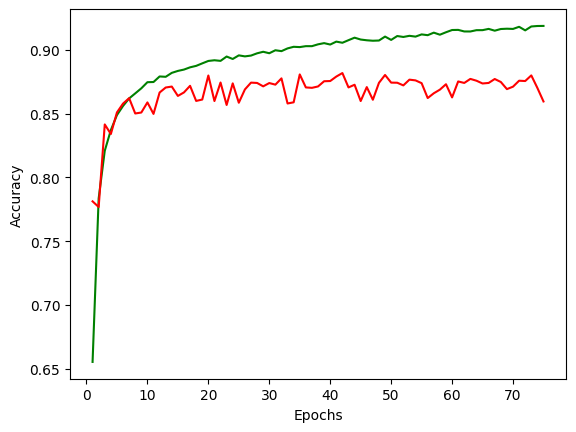

In [13]:
accuracy = history_dnn.history["accuracy"]
val_accuracy = history_dnn.history["val_accuracy"]
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(range(1,76), accuracy, "g", label = "Validation Accuracy")
plt.plot(range(1,76), val_accuracy, "r", label = "Validation Accuracy")